# Generate Sherlock Holmes stories using Markov Chains

To build a Markov Chain we need two things a set of states and the transition probabilities along the states. 

> **MC = {States, Transitions}**

So in this case we will consider the **words as states.** 

Suppose their are two words 'i' amd 'j'. 
To find the transition probabilty from state i to state j we just to traverse our text and compute **what is the probability that the next word will be j given that the current word is i.** If no where in our text j follows i then the transition probabilty will be zero.

> 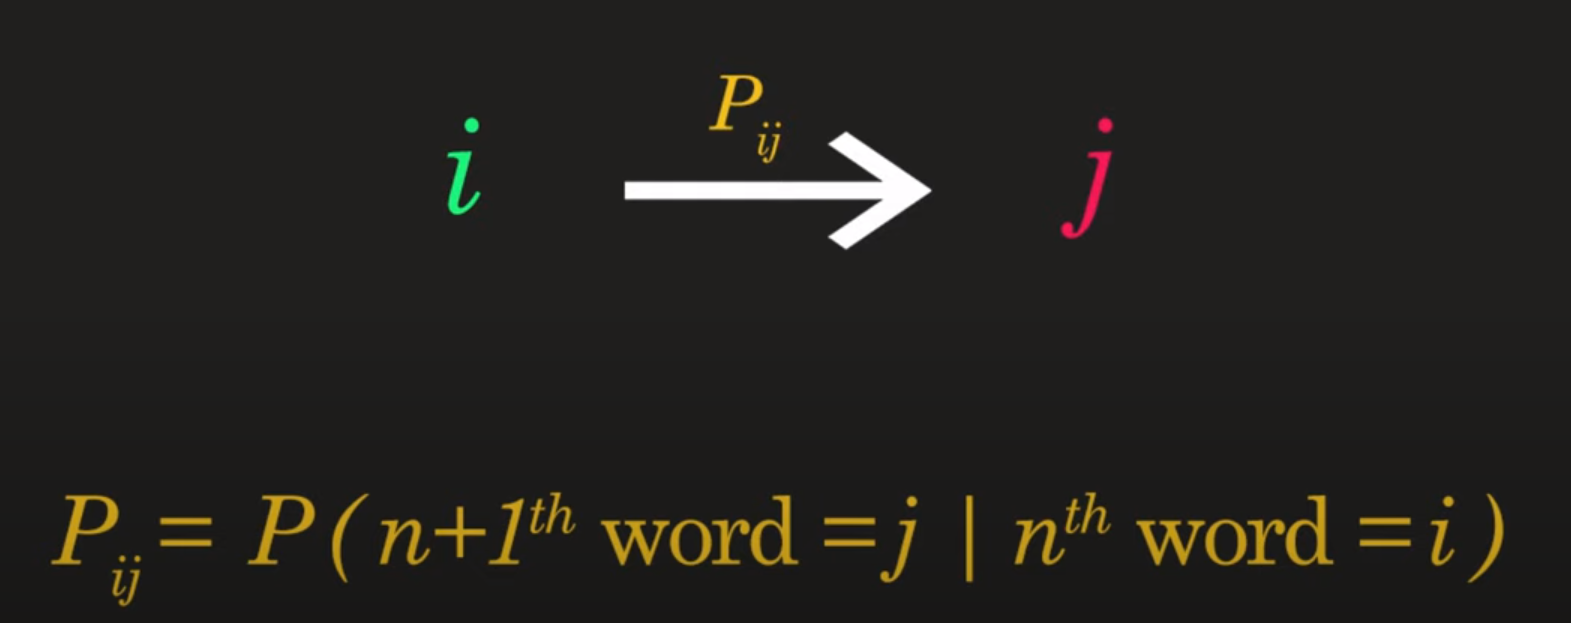

Now lets consider a quote to understand the same.

> 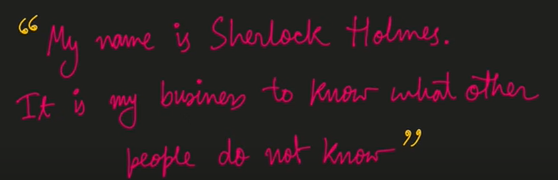

And lets write all the unique words along with the possible transitions.

> 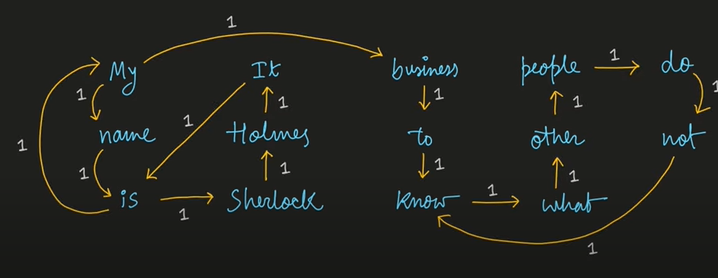

**The number on each arrow denotes the number of times a word appeared after the previous one.** As its a very short text we can see that every transition occurs exactly once. To convert these count into probabilities, we've just divided the count by the total outgoing count from a state. And we can notice somewords have more transitions as compared to other ones. Thus these can be considered as **the statistical properties of piece of text.**

> 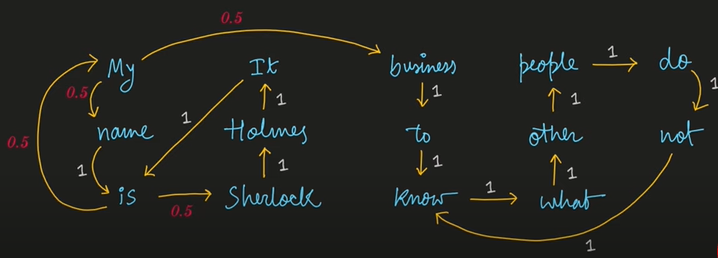


**But now, how can we generate new text from this markov chains?**

Well, we can just simulate a **random walk** starting from a state of our choice. In other words, we will follow the tarnsition probabilities to go to second state from the first state and we will repeat this process for as long as we want.

*****************************************************************************************************

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os  # Importing the os module for interacting with the operating system
import re  # Importing the re module for regular expressions
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random  # Importing the random module for generating random numbers
import glob
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

# Lets use Sherlock Holmes silhouette images as a mask for generated word cloud. 

**Word clouds are visual representations of text data where the size of each word indicates its frequency or importance within the given text. They are created by arranging words in a cloud-like shape, with more prominent words appearing larger and less prominent words appearing smaller.**

They are useful for several reasons:

> **Visualization of Text Data:** Word clouds provide a quick and intuitive way to visualize the most frequent words in a text or corpus. By displaying words in varying sizes, they make it easy to identify the most common and important terms at a glance.

> **Identifying Key Themes and Topics:** Word clouds can help identify key themes, topics, or trends within a body of text. By examining the words that appear most frequently, analysts can gain insights into the main subjects or concepts present in the text.

> **Text Summarization:** They offer a concise summary of the main ideas or topics discussed in a document or dataset. Users can quickly grasp the most prominent terms without having to read through the entire text.

> **Data Exploration and Analysis:** Word clouds can be used as a starting point for further analysis and exploration of text data. They can help researchers or analysts identify interesting patterns, outliers, or anomalies that may warrant further investigation.

*****************************************************************************************************

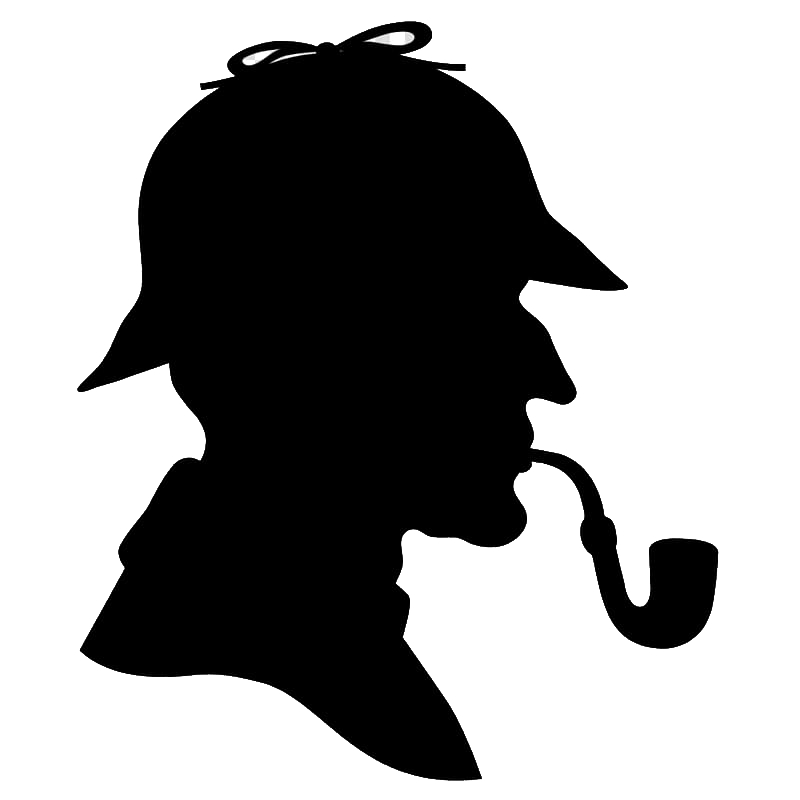

In [2]:
Image.open('Sherlock Holmes Silhouette\sherlock-holmes-head.jpg')

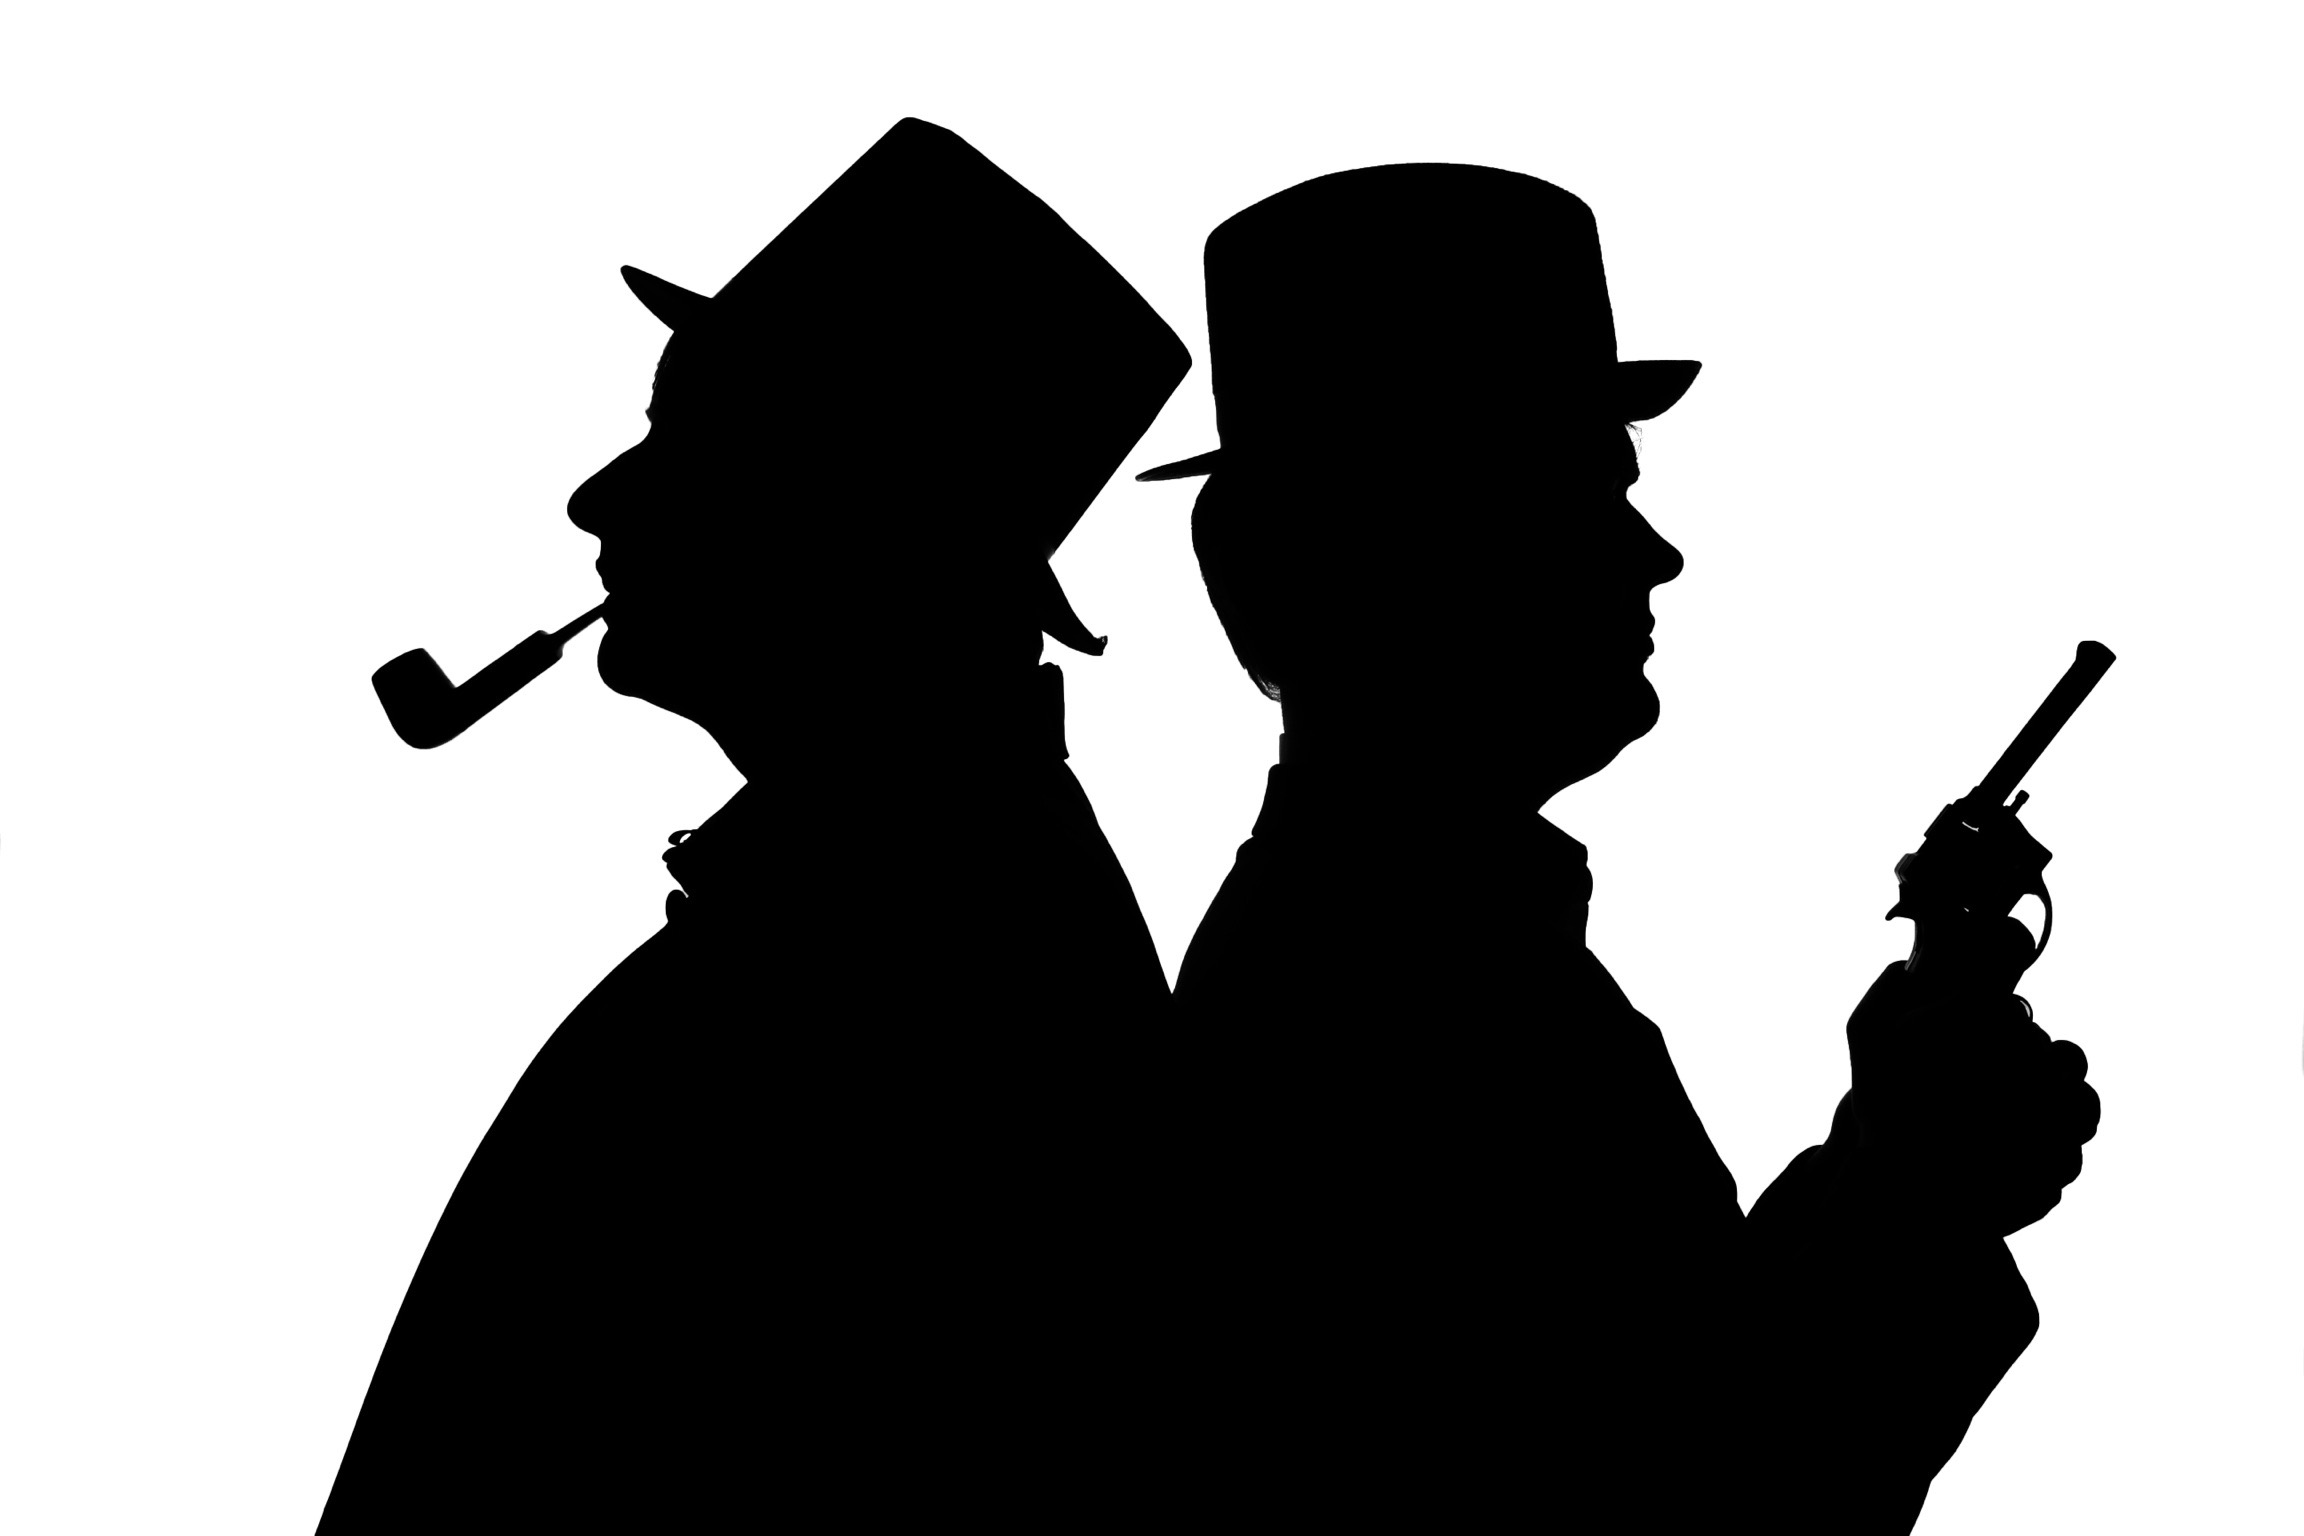

In [3]:
Image.open('Sherlock Holmes Silhouette\sherlock-holmes-and-watson.jpg')

In order to generate a wordcloud we should have a text corpus as the source of word frequencies. So, we will be using the public dataset of Sherlock Holmes stories.

*****************************************************************************************************

In [4]:
open("Sherlock Holmes Stories/fina.txt").readlines()[0:25]

['\n',
 '\n',
 '\n',
 '\n',
 '                                THE FINAL PROBLEM\n',
 '\n',
 '                               Arthur Conan Doyle\n',
 '\n',
 '\n',
 '\n',
 '     It is with a heavy heart that I take up my pen to write these the\n',
 '     last words in which I shall ever record the singular gifts by which\n',
 '     my friend Mr. Sherlock Holmes was distinguished.  In an incoherent\n',
 '     and, as I deeply feel, an entirely inadequate fashion, I have\n',
 '     endeavored to give some account of my strange experiences in his\n',
 '     company from the chance which first brought us together at the period\n',
 '     of the "Study in Scarlet," up to the time of his interference in the\n',
 '     matter of the "Naval Treaty"--an interference which had the\n',
 '     unquestionable effect of preventing a serious international\n',
 '     complication.  It was my intention to have stopped there, and to have\n',
 '     said nothing of that event which has created a void in my 

*****************************************************************************************************

Defining a helper method to draw a wordcloud out of text

In [5]:
def masked_wordcloud(text, mask):
    wordcloud = WordCloud(background_color='white',
                        stopwords = STOPWORDS,
                        max_words = 15000,
                        max_font_size = 86, 
                        random_state = 42,
                        mask = mask)
    wordcloud.generate(text)
    figure_size=(24.0,16.0)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

*****************************************************************************************************

The STOPWORDS parameter allows to exclude some common words like 'the', 'a', 'he' from the result, as they occur frequently in any kind of text and provide no useful information.

*****************************************************************************************************

In [6]:
list(STOPWORDS)[:15]

["can't",
 'ourselves',
 'out',
 'again',
 'during',
 'himself',
 'once',
 'how',
 "weren't",
 'for',
 'she',
 "they'll",
 "doesn't",
 'myself',
 'themselves']

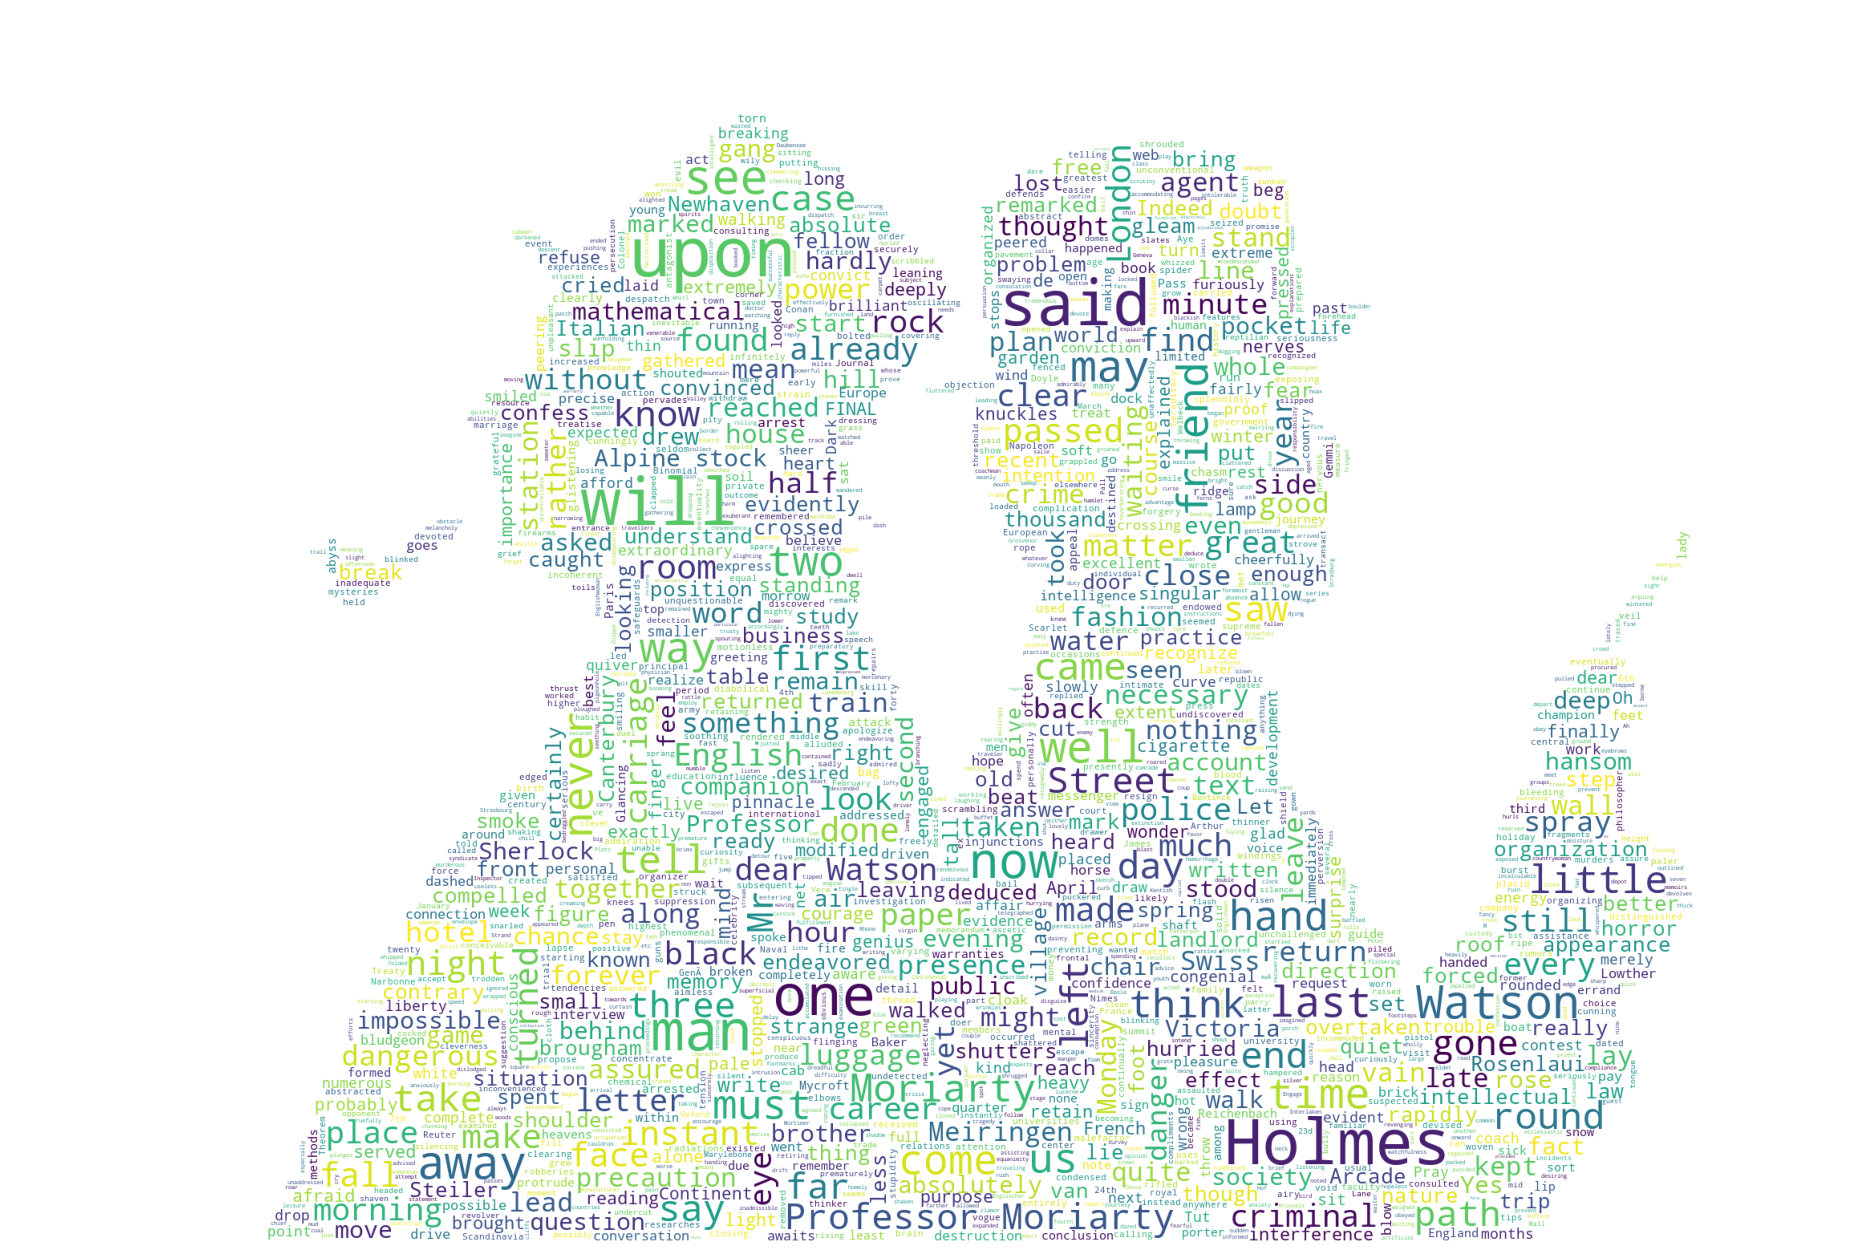

In [7]:
text=open("Sherlock Holmes Stories/fina.txt").read()
mask = np.array(Image.open('Sherlock Holmes Silhouette\sherlock-holmes-and-watson.jpg'))
masked_wordcloud(text, mask)

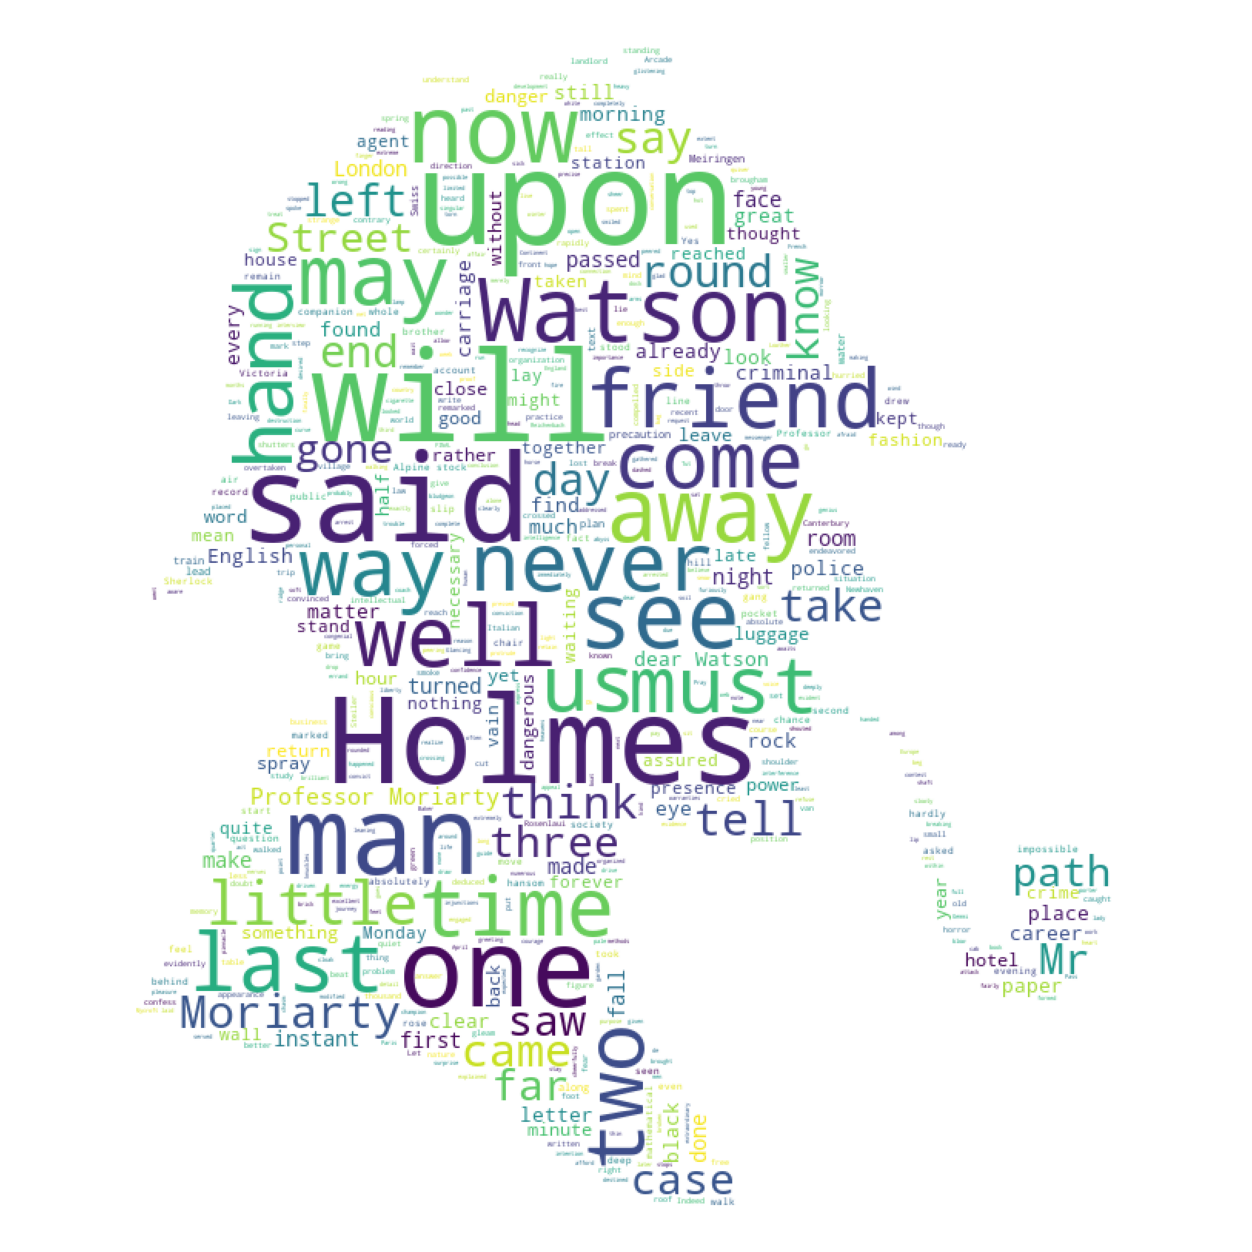

In [8]:
text=open("Sherlock Holmes Stories/fina.txt").read()
mask = np.array(Image.open('Sherlock Holmes Silhouette\sherlock-holmes-head.jpg'))
masked_wordcloud(text, mask)

# Reading every Sherlock Holmes adventure

In [9]:
story_path = "Sherlock Holmes Stories/"

def read_all_stories(story_path):
    
    txt = []  # Creating an empty list to store the lines of text from all stories
    
    # Walking through the directory tree rooted at story_path
    for _, _, files in os.walk(story_path):
        for file in files:
            with open(story_path+file) as f:
                for line in f:
                    line = line.strip()  # Removing leading/trailing whitespaces
                    if line=='----------':  # Checking for a separator between stories
                        break
                    if line!='':  # Skipping empty lines
                        txt.append(line)
    
    # Returning the list of lines from all stories
    return txt
        
stories = read_all_stories(story_path)

# Printing the total number of lines in all stories
print("number of lines = ", len(stories))

number of lines =  215021


# Cleaning the text

This function is going to return an array. And, here we are first converting everything to lowercase, then removing all the punctuations and finally tokenizing it. Tokenizing is important as already discussed we are going to be treating words as states and tokenization just means splitting the sentences into its words. In the last line, it is neglecting everything that is not an English Alphabet. 

*****************************************************************************************************

In [10]:
def clean_txt(txt):
    
    cleaned_txt = []   # Creating an empty list to store cleaned words
    
    for line in txt:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)  # Removing punctuation using regex
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]   # Keeping only alphabetic words
        cleaned_txt+=words
    return cleaned_txt

cleaned_stories = clean_txt(stories)

# Printing the total number of cleaned words
print("number of words = ", len(cleaned_stories))

number of words =  2332110


# Creating the Markov Model

This function takes two things - the lsi of words and n_gram. Though in the concept it has been mentioned that an individual word would be treated as a single state, here we've considered two words as a single state instead. This is so that we can add more context and meaning to our model.

Since markov chains are essentially graphs, dictionaries are the way to go in terms of the data structure one would want to use. Infact it is going to to be a nested dictionary as can be seen below. This is because, we not only need to store the transitions from one state to other, we also need to store the probabilty corresponding to that transition. The outer level of the dictionary will just store the states as keys and in the inner level, the transistion probabilities.

After running the loops, we will get our current state and next state and will now need to include them in our dictionary. To avoid duplicate states, we first check if the current state already exists in the dictionary before adding them and initializing the count as 1. And, if the next state is present then we just need to increment the count else intialize it with 1.

Now, we will compute the transition probabilities from the counts. The concept behind it is as mentioned before, you need to divide the count with the total  outgoing count from a state. 

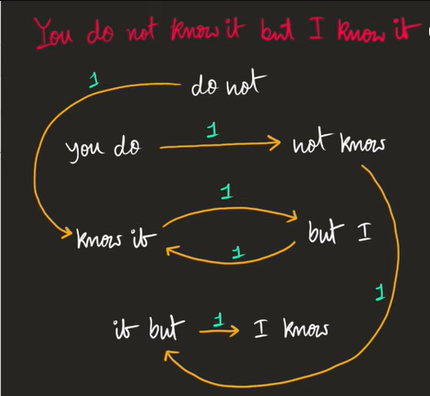
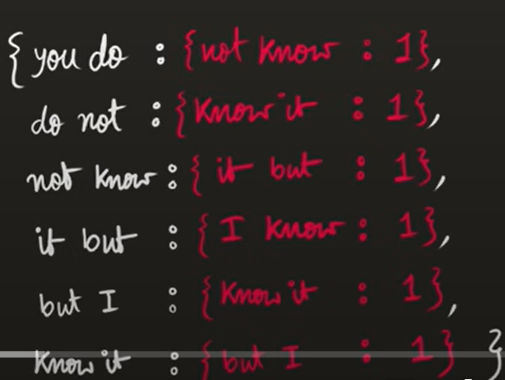

*****************************************************************************************************

In [11]:
def make_markov_model(cleaned_stories, n_gram=2):
    
    markov_model = {}   # Creating an empty dictionary to store the Markov model
    
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""   # Initializing current and next states
        for j in range(n_gram):   # Constructing the current and next states based on n-gram
            curr_state += cleaned_stories[i+j] + " "
            next_state += cleaned_stories[i+j+n_gram] + " "
        curr_state = curr_state[:-1]   # Removing the trailing space
        next_state = next_state[:-1]   # Removing the trailing space
        if curr_state not in markov_model:   # Checking if the current state is already in the model
            markov_model[curr_state] = {}    # Creating a new dictionary for the current state
            markov_model[curr_state][next_state] = 1   # Initializing the count for the next state
        else:
            if next_state in markov_model[curr_state]:   # Checking if the next state is already in the model
                markov_model[curr_state][next_state] += 1   # Incrementing the count for the next state
            else:
                markov_model[curr_state][next_state] = 1
    
    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())   # Calculating the total count for transitions from the current state
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total   # Calculating and updating probabilities
        
    return markov_model

In [12]:
markov_model = make_markov_model(cleaned_stories)

In [13]:
print("Number of states = ", len(markov_model.keys()))

Number of states =  208670


*****************************************************************************************************

Lets check now if our model is accurate. We know that Sherlock Homles most widely known quote ever said is "The game is afoot". So, lets check if our model completes the phrase with those words. 

*****************************************************************************************************

In [14]:
print("All possible transitions from 'the game' state: \n")
print(markov_model['the game'])

All possible transitions from 'the game' state: 

{'your letter': 0.02702702702702703, 'was up': 0.09009009009009009, 'is afoot': 0.036036036036036036, 'for the': 0.036036036036036036, 'was in': 0.02702702702702703, 'is hardly': 0.02702702702702703, 'would have': 0.036036036036036036, 'is up': 0.06306306306306306, 'is and': 0.036036036036036036, 'in their': 0.036036036036036036, 'was whist': 0.036036036036036036, 'in that': 0.036036036036036036, 'the lack': 0.036036036036036036, 'for all': 0.06306306306306306, 'may wander': 0.02702702702702703, 'now a': 0.02702702702702703, 'my own': 0.02702702702702703, 'at any': 0.02702702702702703, 'mr holmes': 0.02702702702702703, 'ay whats': 0.02702702702702703, 'my friend': 0.02702702702702703, 'fairly by': 0.02702702702702703, 'is not': 0.02702702702702703, 'was not': 0.02702702702702703, 'was afoot': 0.036036036036036036, 'worth it': 0.02702702702702703, 'you are': 0.02702702702702703, 'i am': 0.02702702702702703, 'now count': 0.027027027027027

# Generating Sherlock Holmes stories

For this function, we have the markov model, the limit for the number of states to be generated and the starting state depending on which the model will generate a new story.

*****************************************************************************************************

In [15]:
def generate_story(markov_model, limit=100, start='my god'):
    
    n = 0   # Initializing a counter for the number of words generated
    curr_state = start   # Initializing the current state with the starting word
    next_state = None    # Initializing the next state
    story = ""           # Initializing an empty string to store the generated story
    story+=curr_state+" "    # Appending the starting word to the story
    
    while n<limit:           # Looping until the desired number of words is generated
        next_state = random.choices(list(markov_model[curr_state].keys()),    # Choosing the next state randomly
                                    list(markov_model[curr_state].values()))
        
        curr_state = next_state[0]   # Updating the current state
        story+=curr_state+" "        # Appending the current state to the story
        n+=1   # Incrementing the word counter
        
    return story   # Returning the generated story

*****************************************************************************************************

We will notice that most of the sentences do not make any sense whatsoever but the grammatical structure is mostly accurate. This is because the model has followed the statistical property of the text. 

*****************************************************************************************************

In [16]:
# Generating and printing multiple Sherlock Holmes-like stories

for i in range(20):
    print(str(i)+". ", generate_story(markov_model, start="dear holmes", limit=8))

0.  dear holmes what do you think i chose for the day pray what more stanley hopkins thats the 
1.  dear holmes am i day or two since it is out by the fact been verified yes his 
2.  dear holmes am i to do that which others will be sent to miss cushing we may take 
3.  dear holmes he has shown no sign of him i do not desire any particulars my nets are 
4.  dear holmes my previous letters and underneath boats to hire a presentable carriage and were waiting for his 
5.  dear holmes it is not an unnecessary footstep what do you make any local inquiries yes i did 
6.  dear holmes oh yes you can not hold him responsible for that was his life or else as 
7.  dear holmes what do you make of that desperate and defiant villain whom we want but he must 
8.  dear holmes my previous letters and poured them all into the fire while he sprang forward and confronted 
9.  dear holmes you are but youve got mixed watson for this is a very interesting case there is 
10.  dear holmes and tell me what they 

In [17]:
for i in range(20):
    print(str(i)+". ", generate_story(markov_model, start="i would", limit=8))

0.  i would not dare to sell them no wonder that he and his gang in london i can 
1.  i would not lose an instant to wish you a clue an idea an indication no more but 
2.  i would have told us nothing cried the doctor oh there can be no doubt that he had 
3.  i would be glad to hear our approach however the jaunty gallantry of his hand he held a 
4.  i would it seemed to me about a phantom hound and so after a long interval it was 
5.  i would get to the bottom of the unusual this person is the gentleman upon whose front teeth 
6.  i would trust you had you never been in africa and could he pass through the ventilator and 
7.  i would test it to the subject our little problem up and down with a fever he stared 
8.  i would carry such things and made a step forward and ask for your coming and going over 
9.  i would not touch me with bleared drunken eyes for my part i should have no doubt that 
10.  i would have spoken with this cable which showed that he considered the matter the back 

In [18]:
# Generating a longer story starting from "the case"

print(generate_story(markov_model, start="the case", limit=100))

the case with great vigour and lucidity to explain the facts would it not glorious i think that it is possible that the most astute man in europe there was no more of your relations with mr blessington he may be traced between the barrels and the rest of that interrupted message at the door perhaps this is a which was passing in that he has reaped in a short note scribbled as you saw and concealed himself behind the curtain near your door whence he could send her into a corresponding amiability she did not know the news explained the father was away from home with odd boots it is no getting past it i was myself somewhat uneasy when through the long thin form curled up more thickly from his reconnaissance next day he reached the lawn crossed it and he is passionately fond of his office they have taken the thing is beyond anything which you or the police left the room but without result the corridor and down a winding stair the european secretary he would do me no more than this save per

*****************************************************************************************************

Thus, Markov models are commonly used for text generation. In the context of text generation, these states typically represent words or characters, and the transitions between them represent the likelihood of one word or character following another.

There are different orders of Markov models used for text generation:

> **First-order Markov Model:** In this model, each word is generated based only on the preceding word. The probability of generating a word depends only on the immediately preceding word.

> **Higher-order Markov Models:** In higher-order models (e.g., second-order, third-order, etc.), the probability of generating a word depends on a sequence of preceding words of a certain length. For example, in a second-order Markov model, the probability of generating a word depends on the two preceding words.

Markov models are trained on a corpus of text data, where the transition probabilities between words or characters are estimated based on the frequencies observed in the training data. Once the model is trained, it can be used to generate text by selecting words or characters according to the estimated probabilities of transitions.

Text generation using Markov models can produce coherent and realistic-looking text, especially for short passages or sentences. However, Markov models have limitations, such as the inability to capture long-range dependencies or contextual semantics, which may result in generated text that lacks coherence or context. 

**Nonetheless, they are widely used for various text generation tasks, including generating random text, autocomplete suggestions, and generating synthetic data for testing and training purposes.**